In [28]:
import numpy as np
import pandas as pd
import mdtraj as md

In [9]:
def autocorrFFT(x):
      N=len(x)
      F = np.fft.fft(x, n=2*N)  #2*N because of zero-padding
      PSD = F * F.conjugate()
      res = np.fft.ifft(PSD)
      res= (res[:N]).real   #now we have the autocorrelation in convention B
      n=N*np.ones(N)-np.arange(0,N) #divide res(m) by (N-m)
      return res/n #this is the autocorrelation in convention A

In [31]:
def read_lammpstrj():

ValueError: "top" argument is required for load_lammpstrj

In [17]:
[i for i in range(0,9)]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [99]:
a

In [100]:
velocity=[]

In [ ]:
for i in range(22000,40000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)

In [85]:
velocity

[array([[-0.1666943 ,  0.34142193,  0.        ],
        [-0.80282366, -0.46400464,  0.        ],
        [ 0.02301706,  0.12473872,  0.        ],
        ...,
        [-0.00391436, -0.3228609 ,  0.        ],
        [ 0.49760303,  0.38694376,  0.        ],
        [ 0.09972555,  0.88216776,  0.        ]], dtype=float32),
 array([[-0.23080379,  0.23299   ,  0.        ],
        [-0.81868756, -0.49877927,  0.        ],
        [-0.00993583,  0.114001  ,  0.        ],
        ...,
        [-0.01159697, -0.22953463,  0.        ],
        [ 0.52543175,  0.39408818,  0.        ],
        [ 0.10302303,  0.8334481 ,  0.        ]], dtype=float32),
 array([[-0.22256698,  0.07406943,  0.        ],
        [-0.81081223, -0.5090834 ,  0.        ],
        [-0.04320702,  0.10248897,  0.        ],
        ...,
        [-0.01249973, -0.11781819,  0.        ],
        [ 0.5412309 ,  0.39122012,  0.        ],
        [ 0.08720253,  0.7723717 ,  0.        ]], dtype=float32),
 array([[-1.4685355e-01, -9.

In [88]:
varray=np.array(velocity)

In [89]:
varray.shape

(3600, 5200, 3)

In [90]:
vlarge=varray[:,0::13,:]


In [91]:
vlarge.shape

(3600, 400, 3)

In [92]:
vlarge=np.swapaxes(vlarge,0,1)

In [93]:
vlarge=vlarge[:,:,:2].flatten()

In [94]:
np.histogram(vlarge)

(array([    706,   15570,  160034,  661432, 1095958,  729368,  194950,
          21116,     850,      16]),
 array([-1.4278358 , -1.1142769 , -0.800718  , -0.48715913, -0.17360023,
         0.13995868,  0.4535176 ,  0.7670765 ,  1.0806354 ,  1.3941942 ,
         1.7077532 ], dtype=float32))

(array([4.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 0.0000e+00, 4.0000e+00,
        6.0000e+00, 4.0000e+00, 4.0000e+00, 1.0000e+01, 8.0000e+00,
        6.0000e+00, 1.0000e+01, 8.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+01, 6.0000e+00, 1.6000e+01, 8.0000e+00, 8.0000e+00,
        1.8000e+01, 1.8000e+01, 2.0000e+01, 1.6000e+01, 1.8000e+01,
        2.2000e+01, 1.8000e+01, 1.2000e+01, 3.4000e+01, 2.0000e+01,
        2.0000e+01, 1.8000e+01, 3.4000e+01, 3.6000e+01, 4.2000e+01,
        2.8000e+01, 4.8000e+01, 3.2000e+01, 4.8000e+01, 5.8000e+01,
        3.8000e+01, 3.6000e+01, 5.6000e+01, 5.4000e+01, 7.0000e+01,
        7.0000e+01, 6.8000e+01, 5.2000e+01, 7.6000e+01, 7.4000e+01,
        8.0000e+01, 9.4000e+01, 1.3800e+02, 1.1800e+02, 1.2400e+02,
        1.2600e+02, 1.3800e+02, 1.3800e+02, 1.4400e+02, 1.5400e+02,
        1.8400e+02, 2.0800e+02, 2.0200e+02, 1.92

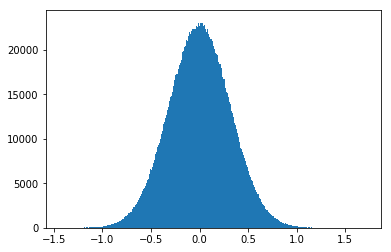

In [95]:
plt.hist(vlarge,bins=500)

In [17]:
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real

In [21]:
PSD_sum[:1800]

array([4.79810909e+04, 4.68733120e+04, 6.58146028e+04, ...,
       1.40459197e+01, 1.47612236e+01, 1.40579673e+01])

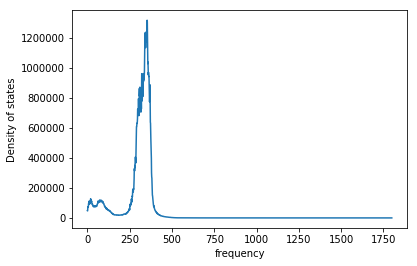

In [29]:
import matplotlib.pyplot as plt
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')

plt.savefig('T_0.05.png')

In [30]:
velocity=[]
for i in range(2200,4000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real


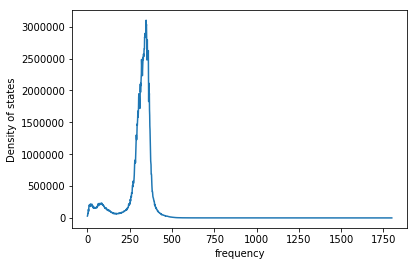

In [32]:
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.10.png')

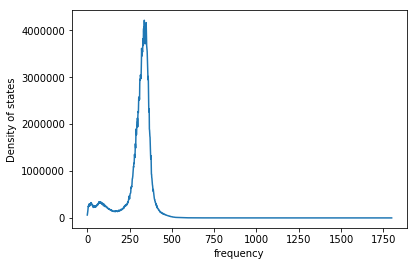

In [33]:
velocity=[]
for i in range(4200,6000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.15.png')

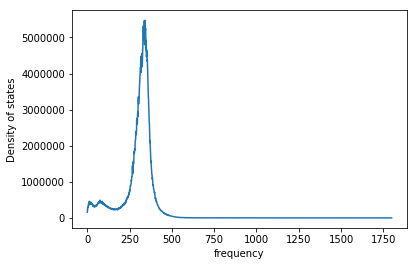

In [34]:
velocity=[]
for i in range(6200,8000):
    velocity1=a[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
plt.savefig('T_0.20.png')

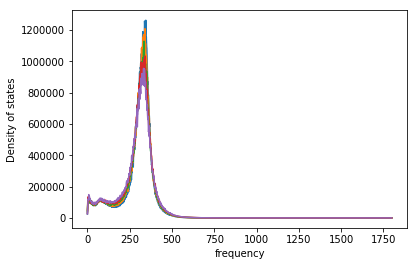

In [38]:
for m in range(5,10):
    velocity=[]
    for i in range(m*2000-1800,m*2000):
        velocity1=a[i].particles.velocity
        velocity.append(velocity1)
    varray=np.array(velocity)
    vlarge=varray[:,0::13,:]
    vlarge=np.swapaxes(vlarge,0,1)
    i=vlarge[1,:,0]
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum=PSD.real
    for j in range(0,3):
        for i in vlarge:
            N=len(i[:,j])
            F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
            PSD = F * F.conjugate()
            PSD_sum+=PSD.real
    plt.plot(PSD_sum[0:1800]/m,label='T%f'%(m*0.05))

    plt.xlabel('frequency')
    plt.ylabel('Density of states')
    plt.savefig('T_%f.png'%(m*0.05))

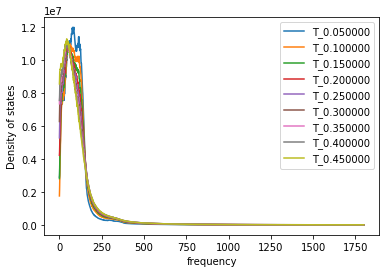

In [49]:
for m in range(1,10):
    velocity=[]
    for i in range(m*2000-1800,m*2000):
        velocity1=a[i].particles.velocity
        velocity.append(velocity1)
    varray=np.array(velocity)
    vsmall=np.delete(varray,np.s_[0::13],axis=1)
    vsmall=np.swapaxes(vsmall,0,1)
    i=vsmall[1,:,0]
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum=PSD.real
    for j in range(0,3):
        for i in vsmall:
            N=len(i[:,j])
            F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
            PSD = F * F.conjugate()
            PSD_sum+=PSD.real
    plt.plot(PSD_sum[0:1800]/m,label='T_%f'%(m*0.05))

    plt.xlabel('frequency')
    plt.ylabel('Density of states')
    plt.legend()
    plt.savefig('T_%f.png'%(m*0.05))

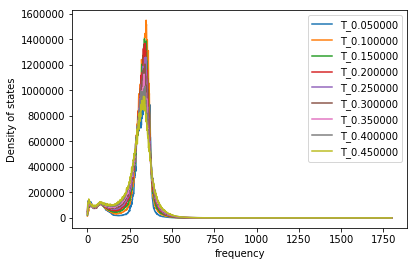

In [50]:
for m in range(1,10):
    velocity=[]
    for i in range(m*2000-1800,m*2000):
        velocity1=a[i].particles.velocity
        velocity.append(velocity1)
    varray=np.array(velocity)
    vlarge=varray[:,0::13,:]
    vlarge=np.swapaxes(vlarge,0,1)
    i=vlarge[1,:,0]
    N=len(i)
    F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
    PSD = F * F.conjugate()
    PSD_sum=PSD.real
    for j in range(0,3):
        for i in vlarge:
            N=len(i[:,j])
            F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
            PSD = F * F.conjugate()
            PSD_sum+=PSD.real
    plt.plot(PSD_sum[0:1800]/m,label='T_%f'%(m*0.05))

    plt.xlabel('frequency')
    plt.ylabel('Density of states')
    plt.legend()
    plt.savefig('T_large_%f.png'%(m*0.05))

In [4]:
b=gsd.hoomd.open("20_1_12_1_npt_finer_2.gsd")

In [5]:
import matplotlib.pyplot as plt

In [7]:
velocity=[]
for i in range(200,2000):
    velocity1=b[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real


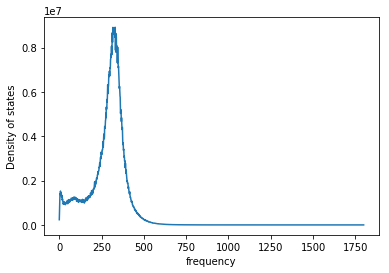

In [8]:
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')


In [13]:
velocity=[]
for i in range(6200,8000):
    velocity1=b[i].particles.velocity
    velocity.append(velocity1)
varray=np.array(velocity)
vlarge=varray[:,0::13,:]
vlarge=np.swapaxes(vlarge,0,1)
i=vlarge[1,:,0]
N=len(i)
F = np.fft.fft(i, n=2*N)  #2*N because of zero-padding
PSD = F * F.conjugate()
PSD_sum=PSD.real
for j in range(0,3):
    for i in vlarge:
        N=len(i[:,j])
        F = np.fft.fft(i[:,j], n=2*N)  #2*N because of zero-padding
        PSD = F * F.conjugate()
        PSD_sum+=PSD.real

Text(0, 0.5, 'Density of states')

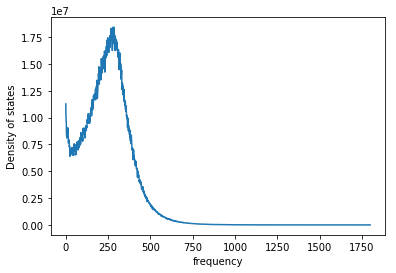

In [14]:
plt.plot(PSD_sum[0:1800])

plt.xlabel('frequency')
plt.ylabel('Density of states')
